<a href="https://colab.research.google.com/github/Huvinesh-Rajendran-12/Data-viz-web-scraping/blob/main/Teleme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!python -V

Python 3.7.13


In [ ]:
# import libraries 
import urllib.request, urllib.parse, urllib.error
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

In [ ]:
url = input("Enter an url: ")
Ratings = {'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5 }
htmlPage = urllib.request.urlopen(url).read()
soup = BeautifulSoup(htmlPage, 'html.parser')

Enter an url: http://books.toscrape.com/


In [ ]:
ratingsCount = dict()
tags = soup.find_all('p', class_='star-rating')
for tag in tags:
  ratingsCount[Ratings.get(tag.get('class')[1])] = ratingsCount.get(Ratings.get(tag.get('class')[1]), 0) + 1
print(ratingsCount)

{3: 3, 1: 6, 4: 4, 5: 4, 2: 3}


In [ ]:
df = pd.DataFrame(list(sorted(ratingsCount.items())), columns=['Ratings','Count'])

In [ ]:
df

,Ratings,Count
0,1,6
1,2,3
2,3,3
3,4,4
4,5,4


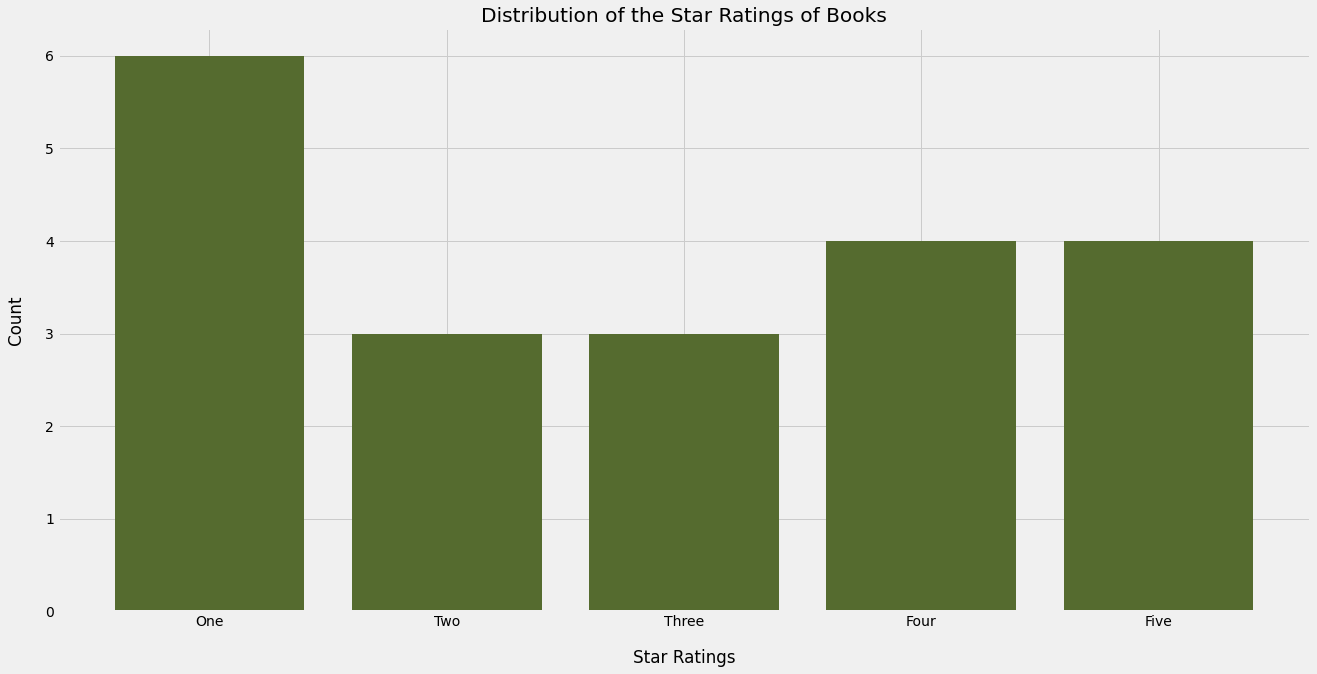

In [ ]:
# plotting a bar chart
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,10))
plt.xlabel('Star Ratings', labelpad=20)
plt.ylabel('Count', labelpad=20)
plt.xticks(df['Ratings'],['One','Two','Three','Four','Five'])
plt.bar(df['Ratings'], df['Count'], color=['darkolivegreen'])
plt.title("Distribution of the Star Ratings of Books")
# plt.grid(False)
plt.show()